<a href="https://colab.research.google.com/github/kirsveta14/Course/blob/master/20_eda_live_coding_inclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import datetime
import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

# Материалы курса [Продвинутый анализ данных в Python](http://portal.moex.com/departments/hr/Training_and_development/internal_coach/Lists/List1/DispForm.aspx?ID=51)

## Введение в EDA
### Cодержание:
- Типичный EDA - описание структуры
- Разбор API matplotlib/seaborn для EDA - `matplotlib.pyplot`, `distplot`, `boxplot`, etc
- Упражнение для самостоятельно разбора

Сегодня мы продолжим (ну или начнем) изучение тех же данных, которыми работали в прошлый раз.

In [0]:
# Зададим необходимые переменные
DIR = ""

In [0]:
!dir

covid19_by_country.csv	sample_data  stat.p


In [0]:
os.listdir()

['.config', 'stat.p', 'covid19_by_country.csv', 'sample_data']

In [0]:
# Чтобы наш анализ был максимально комфортным настроим вывод для pandas
pd.set_option('precision', 2)
pd.set_option('max_rows', 10)
pd.set_option('max_columns', 50)
pd.set_option('max_colwidth', 25)

In [0]:
# Считаем данные
stat = pd.read_pickle(
    "stat.p",
    compression="gzip"
)

### 0.  Цели исследований
Прежде, чем проводить исследование необходимо определиться с его целями. Давайте определимся с целями исследования.

#### Глобальная цель
Получить общее представление о том, какие переменные влияют на распространение вируса (__для этого нам понадобится получить дополнительную информацию для анализа - например макро-показатели разных стран, популяцию и т.п.__)

#### Общие цели
- Исследовать имеющиеся данные
- Получить общее представление о динамике распространения вируса
- __наша цель в рамках курса__ - освоить инструменты для визуализации данных в Python и научиться последовательно проводить исследование данных

В качестве дополнительного источника данных для исследования мы возьмем этот датасет - https://www.kaggle.com/nightranger77/covid19-demographic-predictors?select=covid19_by_country.csv

Он содержит информацию о плотности населения, кол-ве тестов, датах введения карантина и т.п.

In [0]:
# Закрепим знания из прошлого занятия
def load_country_stat(path):
    df = pd.read_csv(path)
    df.columns = df.columns.str.lower().str.replace(" ", "_")
    return df
    
    
country_stat = load_country_stat("covid19_by_country.csv")

### 1. Первичное изучение данных

Важный этап - на нём мы должны:
- Получить общее представления о тех данных, с которыми работаем
- Сразу зафиксировать инсайты о данных, если они будут

Сразу начнем работать с двумя датасетами
- `stat` - дневные показатели для стран и их территориальных делений
- `country_stat` - 


In [0]:
stat.tail()

,date,country_region,province_state,lat,long,deaths,confirmed,recovered
31768,2020-05-19,West Bank and Gaza,,31.95,35.23,0.0,3.0,9.0
31769,2020-05-19,Western Sahara,,24.22,-12.89,0.0,0.0,0.0
31770,2020-05-19,Yemen,,15.55,48.52,8.0,37.0,4.0
31771,2020-05-19,Zambia,,-15.42,28.28,0.0,11.0,0.0
31772,2020-05-19,Zimbabwe,,-20.00,30.00,0.0,0.0,0.0


In [0]:
stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31773 entries, 0 to 31772
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            31773 non-null  datetime64[ns]
 1   country_region  31773 non-null  object        
 2   province_state  31773 non-null  object        
 3   lat             31654 non-null  float64       
 4   long            31654 non-null  float64       
 5   deaths          31388 non-null  float64       
 6   confirmed       31388 non-null  float64       
 7   recovered       31506 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 1.9+ MB


In [0]:
stat.describe()

,lat,long,deaths,confirmed,recovered
count,31654.00,31654.00,31388.00,31388.00,31506.00
mean,21.15,22.54,10.30,156.01,71.40
std,24.86,70.33,92.06,1298.01,976.87
min,-51.80,-135.00,-217.00,-10034.00,-150376.00
25%,6.88,-19.02,0.00,0.00,0.00
50%,23.49,20.97,0.00,0.00,0.00
75%,41.15,78.00,0.00,9.00,2.00
max,71.71,178.06,2612.00,36188.00,33227.00


In [0]:
country_stat.head()

,country,tests,test_pop,density,urban_pop,quarantine,schools,restrictions,hospital_bed,sex0,sex14,sex25,sex54,sex64,sex65plus,sex_ratio,lung,female_lung,male_lung,median_age,gdp_2018,crime_index,population_2020,smoking_2016,females_2018,total_infected,total_deaths,total_recovered
0,Albania,NaN,NaN,105.0,63.0,NaN,NaN,NaN,2.9,1.08,1.11,1.09,0.93,0.95,0.87,0.98,11.67,7.02,17.04,32.9,1.51e+10,40.02,2877.80,28.7,49.06,949,31,742
1,Algeria,NaN,NaN,18.0,73.0,NaN,NaN,NaN,1.9,1.05,1.05,1.05,1.03,1.01,0.89,1.03,8.77,5.03,12.81,28.1,1.74e+11,54.41,43851.04,15.6,49.48,7377,561,3746
2,Argentina,NaN,NaN,17.0,93.0,3/20/2020,NaN,NaN,5.0,1.05,1.06,1.05,1.00,0.94,0.71,0.98,29.27,20.16,42.59,31.7,5.20e+11,62.96,45195.77,21.8,51.24,8809,393,2872
3,Armenia,694.0,4269.80,104.0,63.0,NaN,NaN,NaN,4.2,1.13,1.14,1.06,0.93,0.84,0.67,0.94,23.86,16.17,35.99,35.1,1.24e+10,20.78,2963.24,24.1,52.96,5041,64,2164
4,Australia,31635.0,806.07,3.0,86.0,NaN,NaN,3/23/2020,3.8,1.06,1.06,1.09,0.99,0.93,0.86,0.99,18.79,15.90,22.16,38.7,1.43e+12,42.70,25499.88,14.7,50.20,7072,100,6431


In [0]:
country_stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          96 non-null     object 
 1   tests            47 non-null     float64
 2   test_pop         47 non-null     float64
 3   density          96 non-null     float64
 4   urban_pop        96 non-null     float64
 5   quarantine       15 non-null     object 
 6   schools          15 non-null     object 
 7   restrictions     14 non-null     object 
 8   hospital_bed     96 non-null     float64
 9   sex0             96 non-null     float64
 10  sex14            96 non-null     float64
 11  sex25            96 non-null     float64
 12  sex54            96 non-null     float64
 13  sex64            96 non-null     float64
 14  sex65plus        96 non-null     float64
 15  sex_ratio        95 non-null     float64
 16  lung             96 non-null     float64
 17  female_lung      9

In [0]:
country_stat.describe()

,tests,test_pop,density,urban_pop,hospital_bed,sex0,sex14,sex25,sex54,sex64,sex65plus,sex_ratio,lung,female_lung,male_lung,median_age,gdp_2018,crime_index,population_2020,smoking_2016,females_2018,total_infected,total_deaths,total_recovered
count,47.00,47.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,95.00,96.00,96.00,96.00,96.00,9.60e+01,96.00,9.60e+01,96.00,96.00,9.60e+01,96.00,96.00
mean,30356.32,24405.28,288.48,68.61,3.67,1.06,1.05,1.08,1.09,0.99,0.79,1.02,24.30,18.36,32.34,34.54,8.34e+11,41.30,6.67e+04,22.95,49.55,4.57e+04,3237.22,15464.57
std,67389.05,71249.74,901.31,19.56,2.54,0.02,0.03,0.18,0.47,0.34,0.18,0.29,18.01,15.72,23.14,7.51,2.58e+12,14.39,2.06e+05,9.20,4.54,1.63e+05,11220.65,39354.67
min,500.00,35.59,2.00,18.00,0.30,0.94,0.97,0.83,0.82,0.65,0.46,0.86,7.87,2.76,9.21,17.70,5.33e+09,12.00,3.41e+02,2.00,24.50,1.60e+01,0.00,0.00
25%,1273.00,733.19,47.00,56.75,1.85,1.05,1.04,1.03,0.98,0.88,0.70,0.96,15.61,9.62,20.63,28.45,5.39e+10,29.66,4.30e+03,16.73,49.90,1.55e+03,26.75,682.00
50%,6000.00,2855.81,103.50,70.50,2.90,1.05,1.05,1.05,1.01,0.95,0.78,0.98,19.90,14.93,26.05,35.05,1.85e+11,40.77,1.08e+04,22.90,50.43,7.45e+03,192.50,3204.50
75%,15150.00,6121.77,225.25,84.25,4.85,1.06,1.06,1.07,1.04,0.99,0.86,1.00,26.16,20.68,34.48,41.58,4.68e+11,49.16,4.78e+04,28.80,51.17,2.90e+04,862.50,10091.00
max,320000.00,415993.11,8358.00,99.00,13.40,1.15,1.17,2.64,4.91,3.38,1.71,3.41,114.28,94.59,174.88,47.30,2.05e+13,77.02,1.44e+06,45.90,54.54,1.53e+06,91921.00,289392.00


### 2. Предобработка данных

На этом этапе важно:
- Убедиться, что все типы данных соответствуют их семантике
- Если это необходимо - заменить пропуски в данных

В нашем случае важно корректно провести предобработку данных (трансформацию) для последующего анализа

Причины отрицательных значений в `stat`:
- Ошибка в данных
- Округление?
- Ошибка в преобразованиях (на этапе ETL)

In [0]:
(stat["recovered"] < 0).value_counts()

False    31696
True        77
Name: recovered, dtype: int64

In [0]:
stat[stat["confirmed"]<0]\
.groupby("country_region")["confirmed"].max()\
.sort_values(ascending=False)

country_region
Australia            -1.0
United Kingdom       -1.0
Uganda               -1.0
Canada               -1.0
China                -1.0
                   ...   
Lithuania          -105.0
Portugal           -161.0
Benin              -209.0
Japan              -417.0
Spain            -10034.0
Name: confirmed, Length: 21, dtype: float64

In [0]:
stat = stat[
      (stat["confirmed"] >= 0)
    & (stat["deaths"] >= 0)
    & (stat["recovered"] >= 0)
]

In [0]:
stat.describe()

,lat,long,deaths,confirmed,recovered
count,31251.00,31251.00,31251.00,31251.00,31251.00
mean,21.12,22.56,10.15,156.20,75.16
std,24.85,70.29,91.21,1293.38,485.16
min,-51.80,-135.00,0.00,0.00,0.00
25%,6.88,-19.02,0.00,0.00,0.00
50%,23.34,21.01,0.00,0.00,0.00
75%,41.15,78.00,0.00,9.00,2.00
max,71.71,178.06,2612.00,36188.00,33227.00


In [0]:
# Оставим в country_stat только страны с информацией о тестах
country_stat = country_stat.fillna({"tests": 0, "test_pop": 0})

In [0]:
len(np.union1d(
    country_stat["country"],
    stat["country_region"]
))

191

In [0]:
stat = stat[stat["country_region"].isin(country_stat["country"])]

In [0]:
stat.shape

(20068, 8)

In [0]:
stat.head()

,date,country_region,province_state,lat,long,deaths,confirmed,recovered
268,2020-01-23,Albania,,41.15,20.17,0.0,0.0,0.0
269,2020-01-23,Algeria,,28.03,1.66,0.0,0.0,0.0
273,2020-01-23,Argentina,,-38.42,-63.62,0.0,0.0,0.0
274,2020-01-23,Armenia,,40.07,45.04,0.0,0.0,0.0
275,2020-01-23,Australia,Australian Capital Te...,-35.47,149.01,0.0,0.0,0.0


In [0]:
stat_grouped = stat\
.groupby(["date", "country_region"])[["deaths", "confirmed", "recovered"]].sum().reset_index()\
.rename(columns={"country_region": "country"})

In [0]:
stat_grouped.tail()

,date,country,deaths,confirmed,recovered
10920,2020-05-19,Ukraine,13.0,260.0,356.0
10921,2020-05-19,United Arab Emirates,3.0,873.0,1214.0
10922,2020-05-19,United Kingdom,546.0,2429.0,9.0
10923,2020-05-19,Uruguay,0.0,1.0,10.0
10924,2020-05-19,Vietnam,0.0,0.0,0.0


In [0]:
stat_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10925 entries, 0 to 10924
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       10925 non-null  datetime64[ns]
 1   country    10925 non-null  object        
 2   deaths     10925 non-null  float64       
 3   confirmed  10925 non-null  float64       
 4   recovered  10925 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 426.9+ KB


### 3. Исследование данных

- Изучение общих характеристик данных
- Изучение закономерностей
- Общие выводы по результатам исследований

В нашем случае мы сделаем еще корреляционный анализ

План:
- Распределение числовых признаков по дням
- Распределение по категориям (странам)
- Корреляционный анализ:
  - Соберём витринную таблицу
  - ?Как оценить динамику?
  - ?Достаточно ли суммарное значение для числовых признаков?

In [0]:
cat_features = ["country"]
num_features = ["deaths", "confirmed", "recovered"]

In [0]:
for f in cat_features:
  print("""====== {0} ======
  Уникальные категории: {1}
  """.format(
      f,
      stat_grouped[f].nunique()
      )
  )

====== country ======
  Уникальные категории: 93
  


In [0]:
stat_grouped["country"].value_counts().head(10)

Albania         118
Brazil          118
Israel          118
Moldova         118
Bulgaria        118
Indonesia       118
Oman            118
Thailand        118
Saudi Arabia    118
Peru            118
Name: country, dtype: int64

In [0]:
stat_grouped["country"].value_counts().value_counts()

118    57
117    25
116     9
115     2
Name: country, dtype: int64

In [0]:
stat_grouped.describe()

,deaths,confirmed,recovered
count,10925.00,10925.00,10925.00
mean,19.59,260.80,168.18
std,92.49,934.56,949.98
min,0.00,0.00,0.00
25%,0.00,0.00,0.00
50%,0.00,6.00,0.00
75%,2.00,99.00,16.00
max,1438.00,26849.00,19390.00


In [0]:
stat_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10925 entries, 0 to 10924
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       10925 non-null  datetime64[ns]
 1   country    10925 non-null  object        
 2   deaths     10925 non-null  float64       
 3   confirmed  10925 non-null  float64       
 4   recovered  10925 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 426.9+ KB


In [0]:
stat_grouped[
             (stat_grouped["date"]>= datetime.datetime(2020, 5, 1))
             & (stat_grouped["country"].isin(["Spain", "France"]))
]

,date,country,deaths,confirmed,recovered
9197,2020-05-01,France,218.0,6.0,736.0
9248,2020-05-01,Spain,0.0,1781.0,0.0
9290,2020-05-02,France,166.0,1213.0,451.0
9339,2020-05-02,Spain,557.0,1366.0,5198.0
9381,2020-05-03,France,137.0,407.0,222.0
...,...,...,...,...,...
10676,2020-05-17,France,579.0,63.0,765.0
10727,2020-05-17,Spain,0.0,0.0,0.0
10769,2020-05-18,France,131.0,358.0,516.0
10820,2020-05-18,Spain,146.0,908.0,3930.0


====== deaths ======


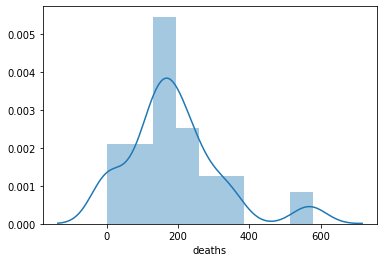

====== confirmed ======


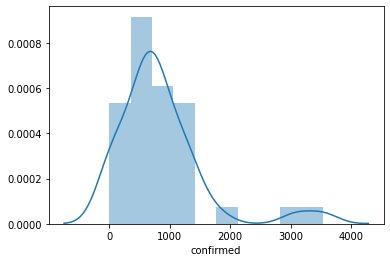

====== recovered ======


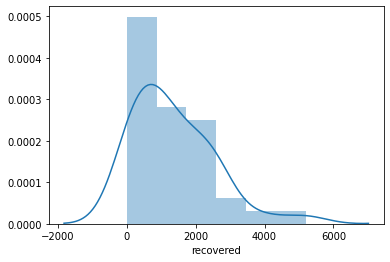

In [0]:
for f in num_features:
  print("""====== {0} ======""".format(f))
  sns.distplot(stat_grouped[
                            (stat_grouped["date"]>= datetime.datetime(2020, 5, 1))
                            & (stat_grouped["country"].isin(["Spain", "France"]))
                            ][f])
  plt.show()

====== deaths ======


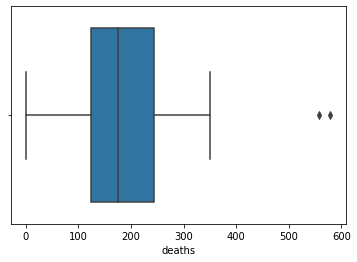

====== confirmed ======


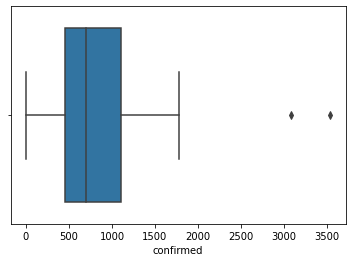

====== recovered ======


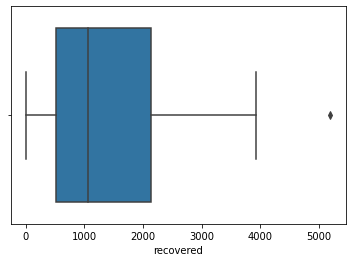

In [0]:
for f in num_features:
  print("""====== {0} ======""".format(f))
  sns.boxplot(stat_grouped[
                            (stat_grouped["date"]>= datetime.datetime(2020, 5, 1))
                            & (stat_grouped["country"].isin(["Spain", "France"]))
                            ][f])
  plt.show()

====== deaths ======


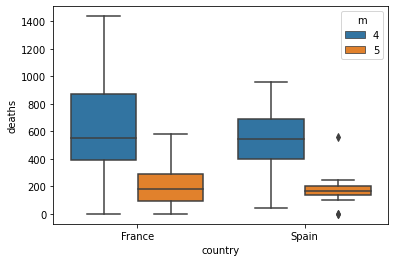

====== confirmed ======


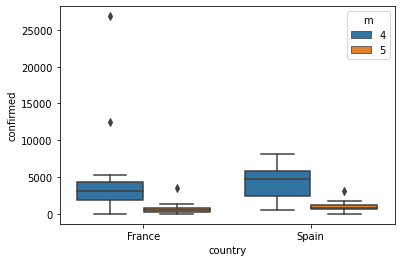

====== recovered ======


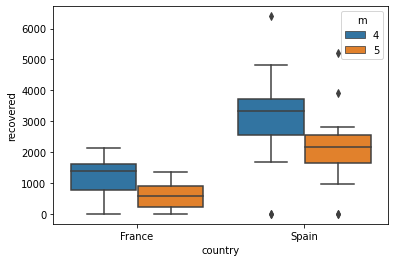

In [0]:
for f in num_features:
  print("""====== {0} ======""".format(f))
  sns.boxplot(
      data=stat_grouped[
                        (stat_grouped["date"]>= datetime.datetime(2020, 4, 1))
                        & (stat_grouped["country"].isin(["Spain", "France"]))
                        ].assign(m=lambda x: x["date"].dt.month)
              ,
      x="country",
      y=f,
      hue="m"
  )
  plt.show()

In [0]:
#Корреляционный анализ

In [0]:
country_stat.head()

,country,tests,test_pop,density,urban_pop,quarantine,schools,restrictions,hospital_bed,sex0,sex14,sex25,sex54,sex64,sex65plus,sex_ratio,lung,female_lung,male_lung,median_age,gdp_2018,crime_index,population_2020,smoking_2016,females_2018,total_infected,total_deaths,total_recovered
0,Albania,0.0,0.00,105.0,63.0,NaN,NaN,NaN,2.9,1.08,1.11,1.09,0.93,0.95,0.87,0.98,11.67,7.02,17.04,32.9,1.51e+10,40.02,2877.80,28.7,49.06,949,31,742
1,Algeria,0.0,0.00,18.0,73.0,NaN,NaN,NaN,1.9,1.05,1.05,1.05,1.03,1.01,0.89,1.03,8.77,5.03,12.81,28.1,1.74e+11,54.41,43851.04,15.6,49.48,7377,561,3746
2,Argentina,0.0,0.00,17.0,93.0,3/20/2020,NaN,NaN,5.0,1.05,1.06,1.05,1.00,0.94,0.71,0.98,29.27,20.16,42.59,31.7,5.20e+11,62.96,45195.77,21.8,51.24,8809,393,2872
3,Armenia,694.0,4269.80,104.0,63.0,NaN,NaN,NaN,4.2,1.13,1.14,1.06,0.93,0.84,0.67,0.94,23.86,16.17,35.99,35.1,1.24e+10,20.78,2963.24,24.1,52.96,5041,64,2164
4,Australia,31635.0,806.07,3.0,86.0,NaN,NaN,3/23/2020,3.8,1.06,1.06,1.09,0.99,0.93,0.86,0.99,18.79,15.90,22.16,38.7,1.43e+12,42.70,25499.88,14.7,50.20,7072,100,6431


In [0]:
stat_grouped.head()

,date,country,deaths,confirmed,recovered
0,2020-01-23,Albania,0.0,0.0,0.0
1,2020-01-23,Algeria,0.0,0.0,0.0
2,2020-01-23,Argentina,0.0,0.0,0.0
3,2020-01-23,Armenia,0.0,0.0,0.0
4,2020-01-23,Australia,0.0,0.0,0.0


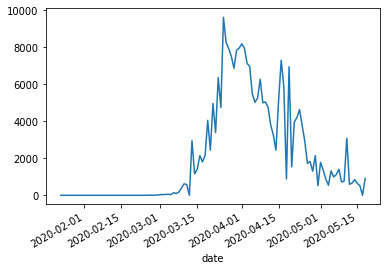

In [0]:
stat_grouped.query("country == 'Spain'").set_index("date")["confirmed"].plot()

In [0]:
stat_full = pd.concat([
    stat_grouped.groupby("country").sum().add_suffix("_sum"),
    country_stat.set_index("country")
], axis=1).drop(columns=["total_infected", "total_deaths", "total_recovered"])

In [0]:
country_stat.columns = country_stat.columns.str.lower().str.replace(" ", "_")

In [0]:
stat_full.head()

,deaths_sum,confirmed_sum,recovered_sum,tests,test_pop,density,urban_pop,quarantine,schools,restrictions,hospital_bed,sex0,sex14,sex25,sex54,sex64,sex65plus,sex_ratio,lung,female_lung,male_lung,median_age,gdp_2018,crime_index,population_2020,smoking_2016,females_2018
Albania,31.0,949.0,742.0,0.0,0.00,105.0,63.0,NaN,NaN,NaN,2.9,1.08,1.11,1.09,0.93,0.95,0.87,0.98,11.67,7.02,17.04,32.9,1.51e+10,40.02,2877.80,28.7,49.06
Algeria,555.0,7278.0,3823.0,0.0,0.00,18.0,73.0,NaN,NaN,NaN,1.9,1.05,1.05,1.05,1.03,1.01,0.89,1.03,8.77,5.03,12.81,28.1,1.74e+11,54.41,43851.04,15.6,49.48
Argentina,393.0,8809.0,2872.0,0.0,0.00,17.0,93.0,3/20/2020,NaN,NaN,5.0,1.05,1.06,1.05,1.00,0.94,0.71,0.98,29.27,20.16,42.59,31.7,5.20e+11,62.96,45195.77,21.8,51.24
Armenia,64.0,5041.0,2164.0,694.0,4269.80,104.0,63.0,NaN,NaN,NaN,4.2,1.13,1.14,1.06,0.93,0.84,0.67,0.94,23.86,16.17,35.99,35.1,1.24e+10,20.78,2963.24,24.1,52.96
Australia,100.0,7082.0,6399.0,31635.0,806.07,3.0,86.0,NaN,NaN,3/23/2020,3.8,1.06,1.06,1.09,0.99,0.93,0.86,0.99,18.79,15.90,22.16,38.7,1.43e+12,42.70,25499.88,14.7,50.20


In [0]:
stat_full.corr().iloc[3:, :3].abs().round(2)\
.sort_values("deaths_sum", ascending=False)\
.style.background_gradient("Reds", axis=1)

,deaths_sum,confirmed_sum,recovered_sum
gdp_2018,0.32,0.43,0.30
median_age,0.26,0.20,0.19
tests,0.25,0.27,0.29
urban_pop,0.18,0.21,0.13
females_2018,0.10,0.03,0.04
population_2020,0.08,0.25,0.13
sex25,0.06,0.01,0.02
sex54,0.06,0.00,0.03
sex_ratio,0.06,0.00,0.03
male_lung,0.05,0.02,0.02


## Домашнее задание
### Часть 1
1. Для каждой страны из датафрейма `stat` посчитайте стандартное отклонение для каждого числового признака, при этом предварительно отфильтровав только те наблюдения, которые следуют за датой первого обнаружения подтвержденного случая `confirmed > 0`
2. Совместите эти данные с датафреймом `country_stat`, также как мы делали это выше
3. Посчитайте корреляцию признаков

### Часть 2
1. Причешите код в ноутбуке
2. Допишите свои общие выводы, следующие из этого исследования
3. Опционально - попробуйте найти альтернативную характеристику динамики кейсов (`confirmed`, `deaths`, `recovered`)

### Часть 1

In [0]:
st1 = stat[stat['confirmed'] > 0]
st1.groupby('country_region')['deaths'].sum()

country_region
Albania                    31.0
Algeria                   555.0
Argentina                 388.0
Armenia                    64.0
Australia                  89.0
                         ...   
Ukraine                   548.0
United Arab Emirates      225.0
United Kingdom          34638.0
Uruguay                    20.0
Vietnam                     0.0
Name: deaths, Length: 93, dtype: float64

In [0]:
# Часть 1
# 1. Для каждой страны из датафрейма stat посчитайте стандартное отклонение для каждого числового 
#    признака, при этом предварительно отфильтровав только те наблюдения, которые следуют за датой
#    первого обнаружения подтвержденного случая confirmed > 0

stat_confirmed = stat[stat['confirmed'] > 0]\
.groupby(['country_region'])[['deaths', 'confirmed', 'recovered', ]].std().reset_index()\
.rename(columns={"country_region": "country"})

stat_confirmed.head()

,country,deaths,confirmed,recovered
0,Albania,0.78,7.78,8.44
1,Algeria,7.25,66.29,51.11
2,Argentina,4.53,98.17,60.73
3,Armenia,1.10,65.19,34.97
4,Australia,0.63,34.74,78.73


In [0]:
stat.head()

,date,country_region,province_state,lat,long,deaths,confirmed,recovered
268,2020-01-23,Albania,,41.15,20.17,0.0,0.0,0.0
269,2020-01-23,Algeria,,28.03,1.66,0.0,0.0,0.0
273,2020-01-23,Argentina,,-38.42,-63.62,0.0,0.0,0.0
274,2020-01-23,Armenia,,40.07,45.04,0.0,0.0,0.0
275,2020-01-23,Australia,Australian Capital Te...,-35.47,149.01,0.0,0.0,0.0


In [0]:
stat.query("confirmed > 0").groupby("country_region")["date"].first()

country_region
Albania                2020-03-09
Algeria                2020-02-25
Argentina              2020-03-03
Armenia                2020-03-01
Australia              2020-01-26
                          ...    
Ukraine                2020-03-03
United Arab Emirates   2020-01-29
United Kingdom         2020-01-31
Uruguay                2020-03-13
Vietnam                2020-01-23
Name: date, Length: 93, dtype: datetime64[ns]

In [0]:
stat_first_dates = stat.query("confirmed > 0").groupby("country_region")["date"].first()\
.reset_index().rename(columns={"date": "date_first"})

In [0]:
stat_first_dates.head()

,country_region,date_first
0,Albania,2020-03-09
1,Algeria,2020-02-25
2,Argentina,2020-03-03
3,Armenia,2020-03-01
4,Australia,2020-01-26


In [0]:
stat = pd.merge(
    stat,
    stat_first_dates,
    how="left",
    on="country_region"
)

In [0]:
stat.head()

,date,country_region,province_state,lat,long,deaths,confirmed,recovered,date_first
0,2020-01-23,Albania,,41.15,20.17,0.0,0.0,0.0,2020-03-09
1,2020-01-23,Algeria,,28.03,1.66,0.0,0.0,0.0,2020-02-25
2,2020-01-23,Argentina,,-38.42,-63.62,0.0,0.0,0.0,2020-03-03
3,2020-01-23,Armenia,,40.07,45.04,0.0,0.0,0.0,2020-03-01
4,2020-01-23,Australia,Australian Capital Te...,-35.47,149.01,0.0,0.0,0.0,2020-01-26


In [0]:
stat_confirmed = stat[stat['date'] >= stat["date_first"]]\
.groupby(['country_region'])[['deaths', 'confirmed', 'recovered', ]].std().reset_index()\
.rename(columns={"country_region": "country"})

stat_confirmed.head()

,country,deaths,confirmed,recovered
0,Albania,0.78,7.78,8.44
1,Algeria,7.23,69.70,50.86
2,Argentina,4.55,100.56,58.65
3,Armenia,1.07,65.47,34.26
4,Australia,0.43,24.22,51.46


In [0]:
country_stat.head()

,country,tests,test_pop,density,urban_pop,quarantine,schools,restrictions,hospital_bed,sex0,sex14,sex25,sex54,sex64,sex65plus,sex_ratio,lung,female_lung,male_lung,median_age,gdp_2018,crime_index,population_2020,smoking_2016,females_2018,total_infected,total_deaths,total_recovered
0,Albania,0.0,0.00,105.0,63.0,NaN,NaN,NaN,2.9,1.08,1.11,1.09,0.93,0.95,0.87,0.98,11.67,7.02,17.04,32.9,1.51e+10,40.02,2877.80,28.7,49.06,949,31,742
1,Algeria,0.0,0.00,18.0,73.0,NaN,NaN,NaN,1.9,1.05,1.05,1.05,1.03,1.01,0.89,1.03,8.77,5.03,12.81,28.1,1.74e+11,54.41,43851.04,15.6,49.48,7377,561,3746
2,Argentina,0.0,0.00,17.0,93.0,3/20/2020,NaN,NaN,5.0,1.05,1.06,1.05,1.00,0.94,0.71,0.98,29.27,20.16,42.59,31.7,5.20e+11,62.96,45195.77,21.8,51.24,8809,393,2872
3,Armenia,694.0,4269.80,104.0,63.0,NaN,NaN,NaN,4.2,1.13,1.14,1.06,0.93,0.84,0.67,0.94,23.86,16.17,35.99,35.1,1.24e+10,20.78,2963.24,24.1,52.96,5041,64,2164
4,Australia,31635.0,806.07,3.0,86.0,NaN,NaN,3/23/2020,3.8,1.06,1.06,1.09,0.99,0.93,0.86,0.99,18.79,15.90,22.16,38.7,1.43e+12,42.70,25499.88,14.7,50.20,7072,100,6431


In [0]:
# 2. Совместите эти данные с датафреймом country_stat, также как мы делали это выше

stat_confirmed_std = pd.concat([
    stat_confirmed.groupby("country").sum().add_suffix("_std"),
    country_stat.set_index("country")
], axis=1)

stat_confirmed_std.head()

,deaths_std,confirmed_std,recovered_std,tests,test_pop,density,urban_pop,quarantine,schools,restrictions,hospital_bed,sex0,sex14,sex25,sex54,sex64,sex65plus,sex_ratio,lung,female_lung,male_lung,median_age,gdp_2018,crime_index,population_2020,smoking_2016,females_2018,total_infected,total_deaths,total_recovered
Albania,0.78,7.78,8.44,0.0,0.00,105.0,63.0,NaN,NaN,NaN,2.9,1.08,1.11,1.09,0.93,0.95,0.87,0.98,11.67,7.02,17.04,32.9,1.51e+10,40.02,2877.80,28.7,49.06,949,31,742
Algeria,7.23,69.70,50.86,0.0,0.00,18.0,73.0,NaN,NaN,NaN,1.9,1.05,1.05,1.05,1.03,1.01,0.89,1.03,8.77,5.03,12.81,28.1,1.74e+11,54.41,43851.04,15.6,49.48,7377,561,3746
Argentina,4.55,100.56,58.65,0.0,0.00,17.0,93.0,3/20/2020,NaN,NaN,5.0,1.05,1.06,1.05,1.00,0.94,0.71,0.98,29.27,20.16,42.59,31.7,5.20e+11,62.96,45195.77,21.8,51.24,8809,393,2872
Armenia,1.07,65.47,34.26,694.0,4269.80,104.0,63.0,NaN,NaN,NaN,4.2,1.13,1.14,1.06,0.93,0.84,0.67,0.94,23.86,16.17,35.99,35.1,1.24e+10,20.78,2963.24,24.1,52.96,5041,64,2164
Australia,0.43,24.22,51.46,31635.0,806.07,3.0,86.0,NaN,NaN,3/23/2020,3.8,1.06,1.06,1.09,0.99,0.93,0.86,0.99,18.79,15.90,22.16,38.7,1.43e+12,42.70,25499.88,14.7,50.20,7072,100,6431


In [0]:
# 3. Посчитайте корреляцию признаков

stat_confirmed_std.corr().iloc[3:, :3].round(2)\
.sort_values("confirmed_std", ascending=False)\
.style.background_gradient("Greens", axis=1)


,deaths_std,confirmed_std,recovered_std
total_infected,0.89,0.89,0.77
total_recovered,0.57,0.70,0.81
total_deaths,0.88,0.67,0.49
gdp_2018,0.26,0.27,0.26
population_2020,0.09,0.22,0.15
test_pop,0.06,0.21,0.11
urban_pop,0.19,0.18,0.18
crime_index,0.10,0.12,0.05
tests,0.17,0.09,0.07
sex65plus,-0.02,0.08,0.07


### Часть 2

2. Допишите свои общие выводы, следующие из этого исследования

Величина коэффициента корреляции стандартного отклонения стран с даты первого подтвержденного случая высокая только с показателями общего количества умерших, выздоровевших и заболевших. С остальными показателями среднее отклонение коррелирует слабо.

### 4. Проверка гипотез

Этот этап мы пропустим - я лишь хочу сказать, что это одна из важных частей исследования и поиска закономерностей. Если у нас будет оставаться время на следующей неделе - мы обязательно разберём эту тему (очень кратко)

### 5. Машинное обучение
Учитывая нашу задачу - эта часть нам также не понадобится. Мы также разберём её если будет время.

### 6. Итоговые выводы

Важно четко зафиксировать итоговые выводы по исследованию